# Exploratory Data Analysis

EDA using Python

## Case Study: New York Taxi Trip Dataset

3 important steps to keep in mind:

1- Understand the data  
2- Clean the data  
3- Find a relationship between the data



# 1. Understanding the Data

In [203]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow.parquet as pq

import datetime as dt


In [204]:
import warnings; warnings.simplefilter('ignore')


In [205]:
## Read the data

nyc_data = pq.read_pandas("nyc_taxi_trip_duration.parquet").to_pandas()


In [206]:
nyc_data.info()

# Non-Null Count gives us the number of non-null values in each column and the Dtype tells us the data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62495 entries, 0 to 62494
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62495 non-null  int64         
 1   lpep_pickup_datetime   62495 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62495 non-null  datetime64[ns]
 3   store_and_fwd_flag     56200 non-null  object        
 4   RatecodeID             56200 non-null  float64       
 5   PULocationID           62495 non-null  int64         
 6   DOLocationID           62495 non-null  int64         
 7   passenger_count        56200 non-null  float64       
 8   trip_distance          62495 non-null  float64       
 9   fare_amount            62495 non-null  float64       
 10  extra                  62495 non-null  float64       
 11  mta_tax                62495 non-null  float64       
 12  tip_amount             62495 non-null  float64       
 13  t

- Non-Null Count gives us the number of non-null values in each column.

In [207]:
nyc_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

- dtype tells us the data type of each column.

In [208]:
## overview of the data
nyc_data.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [209]:
nyc_data.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,0.0,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,0.0,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,0.0,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,0.0,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN
62494,2,2022-01-31 23:52:00,2022-02-01 00:26:00,None,NaN,225,179,NaN,9.60,32.18,0.0,0.0,7.23,10.0,None,0.3,49.71,NaN,NaN,NaN


- **Independent Variables**
  - `id` — a unique identifier for each trip
  - `VendorID` — a code indicating the provider associated with the trip record
  - `lpep_pickup_datetime` — date and time when the meter was engaged
  - `lpep_dropoff_datetime` — date and time when the meter was disengaged
  - `passenger_count` — the number of passengers in the vehicle (driver entered value)
  - `PULocationID` — the Pickup location ID where the meter was engaged
  - `DOLocationID` — the Dropoff location ID where the meter was disengaged
  - `mta_tax` = metropolitan transit authorities Tax
  - `store_and_fwd_flag` — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
  - 
  - `RatecodeID` — the final rate code in effect at the end of the trip
  - `trip_distance` = distance in miles
  - `fare_amount` = fare amount in dollars
  - `extra` = extra charge
  - `tip_amount` = tip amount in dollars
  - `tolls_amount` = tolls amount in dollars
  - `ehail_fee` = ehail fee
  - `improvement_surcharge` = improvement surcharge
  - `total_amount` = total amount in dollars
  - `payment_type` = payment type
  - `trip_type` = trip type
  - `congestion_surcharge` = congestion surcharge

In [210]:
# nyc_data_csv= data.to_csv("nyc_taxi_trip_duration.csv")

In [211]:
# rows and columns
nyc_data.shape

(62495, 20)

In [212]:
nyc_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62495.000000,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000
mean,1.849508,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628
std,0.357556,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000


In [213]:
# unique values of each column
nyc_data.nunique()

VendorID                     2
lpep_pickup_datetime     60635
lpep_dropoff_datetime    60610
store_and_fwd_flag           2
RatecodeID                   5
PULocationID               231
DOLocationID               240
passenger_count              9
trip_distance             1961
fare_amount               2678
extra                       10
mta_tax                      3
tip_amount                1301
tolls_amount                29
ehail_fee                    0
improvement_surcharge        3
total_amount              4026
payment_type                 5
trip_type                    2
congestion_surcharge         3
dtype: int64

In [214]:
# columns names
nyc_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [215]:
nyc_data['RatecodeID'].unique()

array([ 1.,  5.,  4.,  3.,  2., nan])

In [216]:
nyc_data['VendorID'].append(nyc_data['ehail_fee']).unique()

array([2, 1, None], dtype=object)

# 2. Cleaning and Filtering the DATA

In [217]:
# find missing values

# Null values in each column
nyc_data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        6295
RatecodeID                6295
PULocationID                 0
DOLocationID                 0
passenger_count           6295
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                62495
improvement_surcharge        0
total_amount                 0
payment_type              6295
trip_type                 6295
congestion_surcharge      6295
dtype: int64

In [218]:
## drop ehail_fee column

nyc_data_clean= nyc_data.drop(['ehail_fee'], axis=1)
nyc_data_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,0.3,31.26,1.0,1.0,2.75


In [219]:
## original dataset shape
nyc_data.shape

(62495, 20)

In [220]:
## new dataset shape
## one column has been deleted
nyc_data_clean.shape

(62495, 19)

In [221]:
## Null values in each column

nyc_data_clean.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       6295
RatecodeID               6295
PULocationID                0
DOLocationID                0
passenger_count          6295
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             6295
trip_type                6295
congestion_surcharge     6295
dtype: int64

In [222]:
62495-6295

56200

In [223]:
## original dataset
nyc_data.shape

(62495, 20)

In [224]:
## drop rows with missing values = 6295

nyc_data_clean_dropna = nyc_data_clean.dropna()
nyc_data_clean_dropna.shape

(56200, 19)

In [225]:
## now we don't have any missing values

nyc_data_clean_dropna.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [226]:
nyc_data_clean_dropna.value_counts()

VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  payment_type  trip_type  congestion_surcharge
1         2022-01-01 00:10:09   2022-01-01 00:26:19    N                   1.0         33            141           2.0              7.20           22.0         3.25   0.5      5.20        0.0           0.3                    31.25         1.0           1.0        2.75                    1
2         2022-01-19 16:07:59   2022-01-19 16:09:33    N                   1.0         226           226           1.0              0.25           3.0          1.00   0.5      0.00        0.0           0.3                    4.80          2.0           1.0        0.00                    1
          2022-01-19 16:03:20   2022-01-19 16:09:49    N                   1.0         95            28            1.0              1.4

In [227]:
nyc_data_clean_dropna["VendorID"].value_counts()

# so we have 2 vendors
# 1 and 2
# 2 is the most popular

2    46952
1     9248
Name: VendorID, dtype: int64

In [228]:
## compare the original dataset with the new one

## original dataset
nyc_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62495.000000,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000
mean,1.849508,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628
std,0.357556,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000


In [229]:
## new dataset

nyc_data_clean_dropna.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000,56200.000000
mean,1.835445,1.198719,95.618630,135.728719,1.258399,4.263723,13.060379,0.385690,0.472625,1.517680,0.166456,0.297021,16.497384,1.403594,1.040925,0.706628
std,0.370782,0.862313,61.151567,77.743344,0.877743,381.428500,11.733223,0.682687,0.120803,2.341245,1.092265,0.039178,13.021279,0.516316,0.198119,1.201632
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.500000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,61.000000,74.000000,1.000000,1.030000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.120000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,135.000000,1.000000,1.790000,10.000000,0.000000,0.500000,0.960000,0.000000,0.300000,13.100000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,216.000000,1.000000,3.210000,15.500000,0.500000,0.500000,2.410000,0.000000,0.300000,19.860000,2.000000,1.000000,2.750000
max,2.000000,5.000000,265.000000,265.000000,8.000000,90420.670000,604.500000,4.500000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000


In [230]:
## finding outliers

nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

<AxesSubplot: xlabel='VendorID', ylabel='count'>

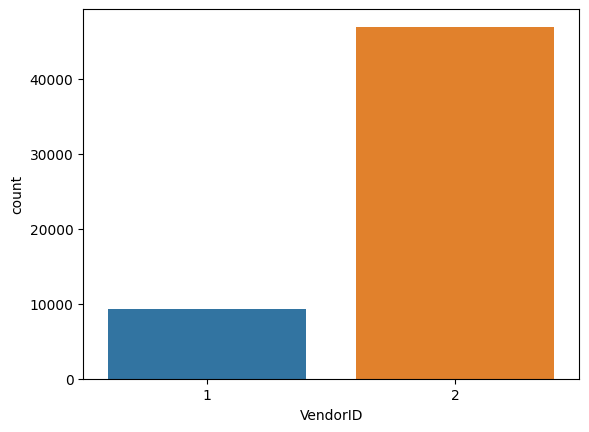

In [231]:
sns.countplot(x = "VendorID", data = nyc_data_clean_dropna)

<AxesSubplot: >

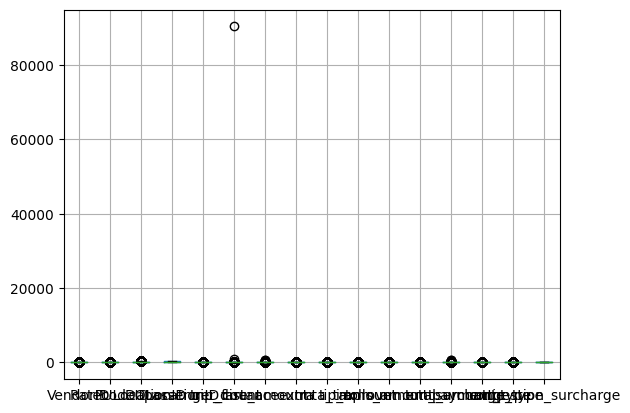

In [232]:
nyc_data_clean_dropna.boxplot()

- the data is very large, and can't be seen in one graph, so we need to filter it
- we can clearly see that there are some outliers in the data, so we need to filter them out

## Distance (removing the outliers)


In [233]:
nyc_data_clean_dropna.columns
nyc_data_clean_dropna['trip_distance'].value_counts()

0.00     3403
1.40      537
1.10      464
1.30      449
1.20      438
         ... 
11.24       1
10.04       1
11.87       1
15.62       1
11.98       1
Name: trip_distance, Length: 1747, dtype: int64

- We see there are 3399 trips with 0 km distance.
- The reasons for 0 km distance can be:
- The dropoff location couldn’t be tracked.
- The driver deliberately took this ride to complete a target ride number.
- The passengers canceled the trip.
- We will analyze these trips further in bivariate analysis.

<AxesSubplot: >

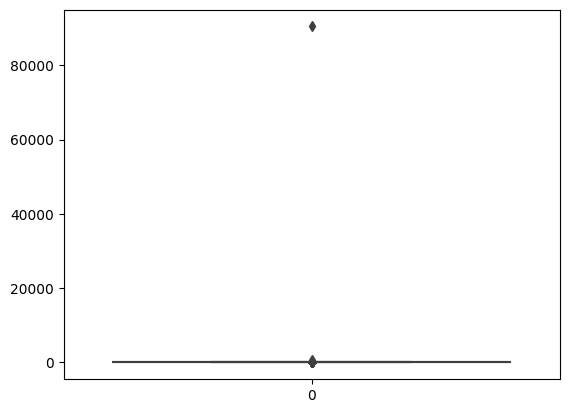

In [234]:
sns.boxplot(nyc_data_clean_dropna['trip_distance'])

**- We can clearly see an outlier.**
**- lets remove the outliers**

In [235]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)

27793    90420.67
31878      706.19
48630      123.71
34239      109.83
9104       105.57
           ...   
2561         0.00
37885        0.00
37877        0.00
37858        0.00
53030        0.00
Name: trip_distance, Length: 56200, dtype: float64

- We can see that there is an entry which is significantly different from others.
- As there is a single row only, let us drop this row.

In [236]:
nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 90420.67].index, inplace = True)

**- let's remove the second outlier**

In [237]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)

31878    706.19
48630    123.71
34239    109.83
9104     105.57
4085      65.90
          ...  
2561       0.00
37885      0.00
37877      0.00
37858      0.00
53030      0.00
Name: trip_distance, Length: 56199, dtype: float64

In [238]:
nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 706.19].index, inplace = True)

In [239]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)

48630    123.71
34239    109.83
9104     105.57
4085      65.90
7389      65.77
          ...  
2561       0.00
37885      0.00
37877      0.00
37858      0.00
53030      0.00
Name: trip_distance, Length: 56198, dtype: float64

In [240]:
# ## Distance (removing the outliers)
# nyc_data_clean_dropna.columns
# nyc_data_clean_dropna['trip_distance'].value_counts()

# - We see there are 3399 trips with 0 km distance.
# - The reasons for 0 km distance can be:
# - The dropoff location couldn’t be tracked.
# - The driver deliberately took this ride to complete a target ride number.
# - The passengers canceled the trip.
# - We will analyze these trips further in bivariate analysis.

# sns.boxplot(nyc_data_clean_dropna['trip_distance'])

# **- We can clearly see an outlier.**
# **- lets remove the outliers**
# nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)

# - We can see that there is an entry which is significantly different from others.
# - As there is a single row only, let us drop this row.

# nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 90420.67].index, inplace = True)

# **- let's remove the second outlier**
# nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)

# nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 706.19].index, inplace = True)

# nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)


## Correlation Matrix 
- to see the correlation between the variables

In [241]:
nyc_data_clean_dropna.corr()
corr_nyc_data = nyc_data_clean_dropna.corr()

<AxesSubplot: >

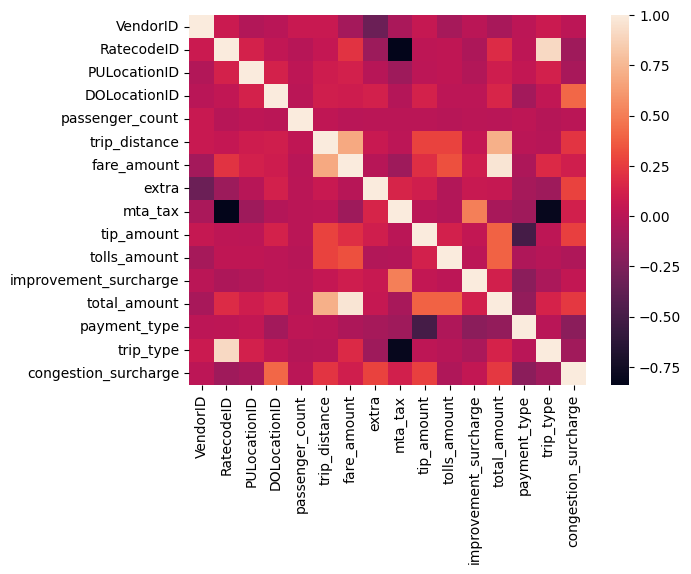

In [242]:
sns.heatmap(corr_nyc_data)

- Heatmap of the correlation matrix

<AxesSubplot: >

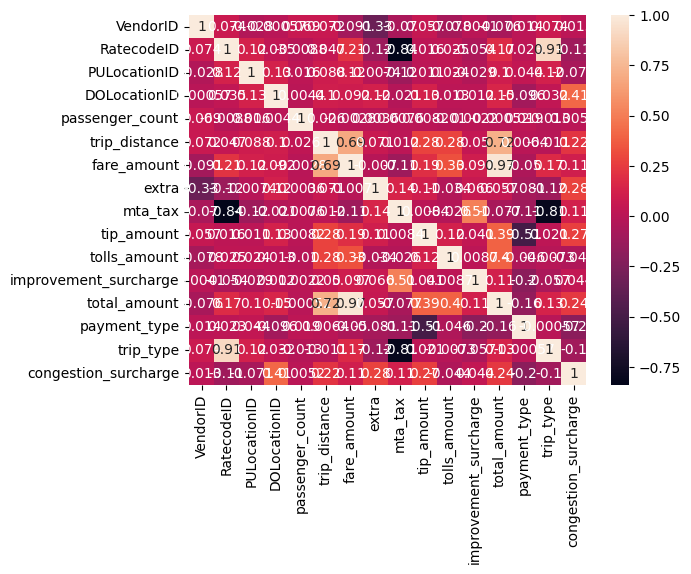

In [243]:
sns.heatmap(corr_nyc_data, annot=True)

# Feature Creation

## 1. time_duration_minutes

In [244]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [245]:
nyc_data_clean_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56198 entries, 0 to 56199
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56198 non-null  int64         
 1   lpep_pickup_datetime   56198 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  56198 non-null  datetime64[ns]
 3   store_and_fwd_flag     56198 non-null  object        
 4   RatecodeID             56198 non-null  float64       
 5   PULocationID           56198 non-null  int64         
 6   DOLocationID           56198 non-null  int64         
 7   passenger_count        56198 non-null  float64       
 8   trip_distance          56198 non-null  float64       
 9   fare_amount            56198 non-null  float64       
 10  extra                  56198 non-null  float64       
 11  mta_tax                56198 non-null  float64       
 12  tip_amount             56198 non-null  float64       
 13  t

In [246]:
nyc_data_clean_dropna.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

- if 

    > lpep_pickup_datetime  ==   object
    >
    > lpep_dropoff_datetime  ==  object

you can convert it to date-time using

> ` data['lpep_pickup_datetime']=pd.to_datetime(data['lpep_pickup_datetime'])`
> ` data['lpep_dropoff_datetime']=pd.to_datetime(data['lpep_dropoff_datetime'])`


Now if you will run the dtypes function again, you will be able to see the type as datetime64[ns].



- #### Now, let us extract and create new features from this datetime features we just created.



In [247]:
nyc_data_clean_dropna['pickup_day']=nyc_data_clean_dropna['lpep_pickup_datetime'].dt.day_name()
nyc_data_clean_dropna['dropoff_day']=nyc_data_clean_dropna['lpep_dropoff_datetime'].dt.day_name()

nyc_data_clean_dropna['pickup_day_no']=nyc_data_clean_dropna['lpep_pickup_datetime'].dt.weekday
nyc_data_clean_dropna['dropoff_day_no']=nyc_data_clean_dropna['lpep_dropoff_datetime'].dt.weekday

nyc_data_clean_dropna['pickup_hour']=nyc_data_clean_dropna['lpep_pickup_datetime'].dt.hour
nyc_data_clean_dropna['dropoff_hour']=nyc_data_clean_dropna['lpep_dropoff_datetime'].dt.hour

nyc_data_clean_dropna['pickup_month']=nyc_data_clean_dropna['lpep_pickup_datetime'].dt.month
nyc_data_clean_dropna['dropoff_month']=nyc_data_clean_dropna['lpep_dropoff_datetime'].dt.month

- **We have created the following features:**
    - pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
    - pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
    - pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
    - pickup_month and dropoff_month with month number with January=1 and December=12.

**Next, I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)**

In [248]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

- Now let us apply this function and create new columns in the dataset.

In [249]:
nyc_data_clean_dropna['pickup_timeofday']=nyc_data_clean_dropna['pickup_hour'].apply(time_of_day)
nyc_data_clean_dropna['dropoff_timeofday']=nyc_data_clean_dropna['dropoff_hour'].apply(time_of_day)

- We also saw during dataset exploration that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.
  
- So, the most obvious feature that we can extract from this is `distance`. Let us do that.

>Importing the library which lets us calculate `distance` from geographical coordinates.

In [250]:
## Importing the library which lets us calculate distance from geographical coordinates.


## pip install geopy
from geopy.distance import great_circle


In [251]:
nyc_data_clean_dropna.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,Saturday,Saturday,5,5,0,0,1,1,Late night,Late night
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,Saturday,Saturday,5,5,0,0,1,1,Late night,Late night
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,Saturday,Saturday,5,5,0,1,1,1,Late night,Late night
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,Saturday,Saturday,5,5,0,0,1,1,Late night,Late night
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,Saturday,Saturday,5,5,0,0,1,1,Late night,Late night


**- Thus, we successfully created some new features which we will analyze in univariate and bivariate analysis.**

## Feature Creation 
## 2. trip_duration_minutes

In [252]:
## trip duration using lpep_pickup_datetime and lpep_dropoff_datetime in minutes

def trip_duration_minutes(row):
    return (row['lpep_dropoff_datetime'] - row['lpep_pickup_datetime']).total_seconds() / 60
    


In [253]:
## Finally, applying the function to our dataset and creating the feature "trip_duration_minutes".

nyc_data_clean_dropna['trip_duration_minutes'] = nyc_data_clean_dropna.apply(trip_duration_minutes, axis=1)

In [254]:
nyc_data_clean_dropna.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration_minutes
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,1.200000
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.716667
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,Saturday,5,5,0,1,1,1,Late night,Late night,16.200000
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.250000
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,21.033333


# Univariate Analysis


## trip_duration_minutes

<AxesSubplot: xlabel='trip_duration_minutes', ylabel='Count'>

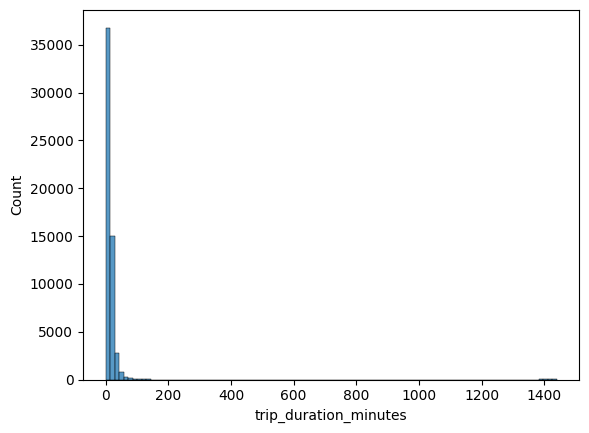

In [255]:
sns.histplot(nyc_data_clean_dropna['trip_duration_minutes'], kde=False, bins=100)


- The histogram is really skewed as we can see.



<AxesSubplot: xlabel='trip_duration_minutes'>

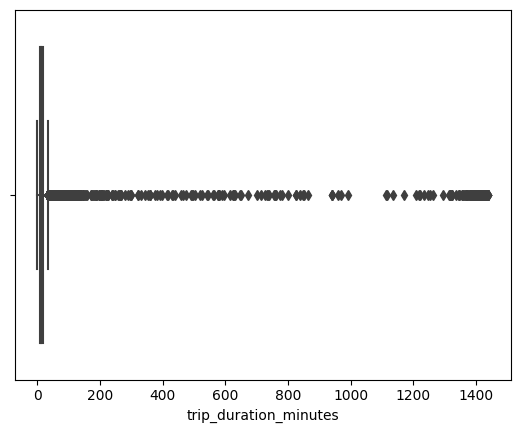

In [256]:
sns.boxplot(x = "trip_duration_minutes",
            # palette=["red"],
            data = nyc_data_clean_dropna)


- We can see some trips durations are very long


In [257]:
nyc_data_clean_dropna['trip_duration_minutes'].sort_values(ascending=False)


50347    1439.466667
33663    1439.150000
41142    1438.483333
8781     1438.333333
37607    1438.300000
            ...     
51401       0.000000
24666       0.000000
45664       0.000000
34264       0.000000
42876       0.000000
Name: trip_duration_minutes, Length: 56198, dtype: float64

- We can clearly see an outliers or some trips durations are very long
- outliers can be removed by droping the rows.

## VendorID

<AxesSubplot: xlabel='VendorID', ylabel='count'>

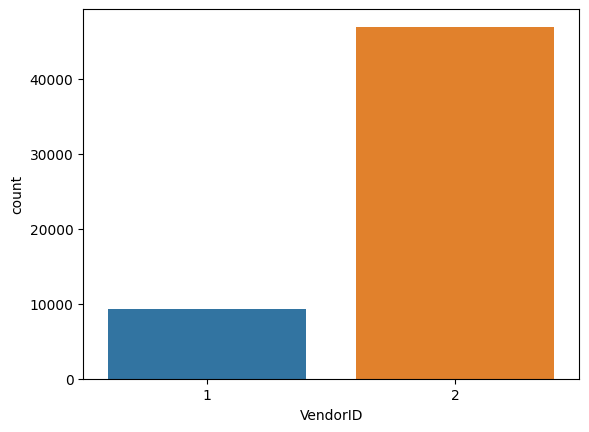

In [258]:
sns.countplot(x = "VendorID", data = nyc_data_clean_dropna)

- We see that there is much difference between the trips taken by both vendors.



In [259]:
nyc_data_clean_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56198 entries, 0 to 56199
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56198 non-null  int64         
 1   lpep_pickup_datetime   56198 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  56198 non-null  datetime64[ns]
 3   store_and_fwd_flag     56198 non-null  object        
 4   RatecodeID             56198 non-null  float64       
 5   PULocationID           56198 non-null  int64         
 6   DOLocationID           56198 non-null  int64         
 7   passenger_count        56198 non-null  float64       
 8   trip_distance          56198 non-null  float64       
 9   fare_amount            56198 non-null  float64       
 10  extra                  56198 non-null  float64       
 11  mta_tax                56198 non-null  float64       
 12  tip_amount             56198 non-null  float64       
 13  t

In [260]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

## Passenger Count


In [261]:
nyc_data_clean_dropna.passenger_count.value_counts()


1.0    48908
2.0     4243
5.0     1086
6.0      805
3.0      728
0.0      214
4.0      207
8.0        5
7.0        2
Name: passenger_count, dtype: int64

- There are some trips with even 0 passenger count (drivers themselves)
- The distibution is quite different


<AxesSubplot: xlabel='passenger_count', ylabel='count'>

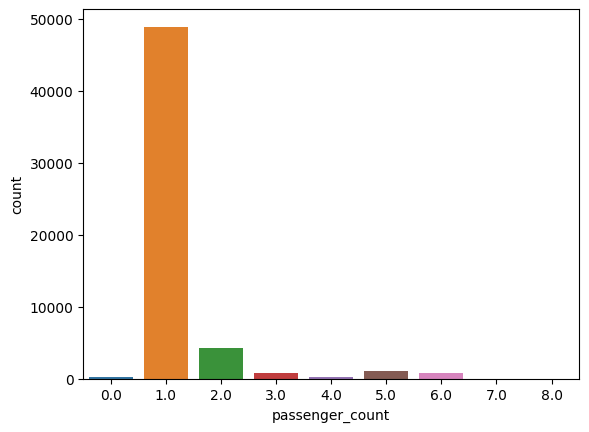

In [262]:
sns.countplot(x='passenger_count',data=nyc_data_clean_dropna)

- We see the highest amount of trips are with 1 passenger.

- Let us remove the rows which have 7 or 8 passenger count.


In [263]:
nyc_data_clean_dropna=nyc_data_clean_dropna[nyc_data_clean_dropna['passenger_count']<=6]


In [264]:
nyc_data_clean_dropna.passenger_count.value_counts()

1.0    48908
2.0     4243
5.0     1086
6.0      805
3.0      728
0.0      214
4.0      207
Name: passenger_count, dtype: int64

- Distribution looks better than the previous one

## Store and Forward Flag


In [265]:
nyc_data_clean_dropna['store_and_fwd_flag'].value_counts(normalize=True)


N    0.989162
Y    0.010838
Name: store_and_fwd_flag, dtype: float64

- We see there are almost 1% of trips that were stored before forwarding.


## Distance (removing the outliers)

In [266]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

In [267]:
nyc_data_clean_dropna['trip_distance'].value_counts()


0.00     3399
1.40      537
1.10      464
1.30      449
1.20      438
         ... 
18.62       1
16.57       1
18.39       1
18.20       1
11.98       1
Name: trip_distance, Length: 1745, dtype: int64

- We see there are 3399 trips with 0 km distance.
- The reasons for 0 km distance can be:
- The dropoff location couldn’t be tracked.
- The driver deliberately took this ride to complete a target ride number.
- The passengers canceled the trip.
- We will analyze these trips further in bivariate analysis.


<AxesSubplot: >

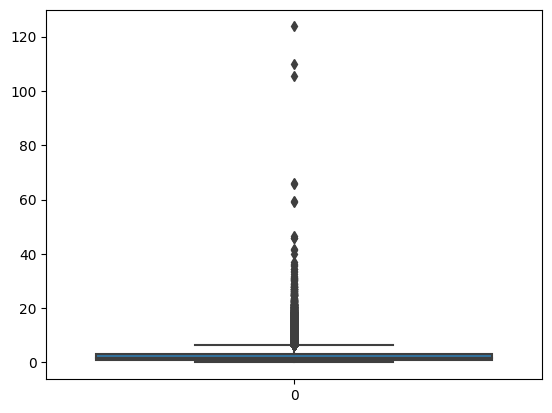

In [268]:
sns.boxplot(nyc_data_clean_dropna['trip_distance'])


**- We can clearly see an outlier.**

**- lets remove the outliers**

In [269]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)


48630    123.71
34239    109.83
9104     105.57
4085      65.90
7389      65.77
          ...  
28404      0.00
18312      0.00
8018       0.00
8023       0.00
33670      0.00
Name: trip_distance, Length: 56191, dtype: float64

- We can see that there is an entry which is significantly different from others.
- As there is a single row only, let us drop this row.


In [270]:
nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 90420.67].index, inplace = True)


**- let's remove the second outlier**

In [271]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)


48630    123.71
34239    109.83
9104     105.57
4085      65.90
7389      65.77
          ...  
28404      0.00
18312      0.00
8018       0.00
8023       0.00
33670      0.00
Name: trip_distance, Length: 56191, dtype: float64

In [272]:
nyc_data_clean_dropna.drop(nyc_data_clean_dropna[nyc_data_clean_dropna['trip_distance'] == 706.19].index, inplace = True)


In [273]:
nyc_data_clean_dropna['trip_distance'].sort_values(ascending=False)


48630    123.71
34239    109.83
9104     105.57
4085      65.90
7389      65.77
          ...  
28404      0.00
18312      0.00
8018       0.00
8023       0.00
33670      0.00
Name: trip_distance, Length: 56191, dtype: float64

## Trips per Day

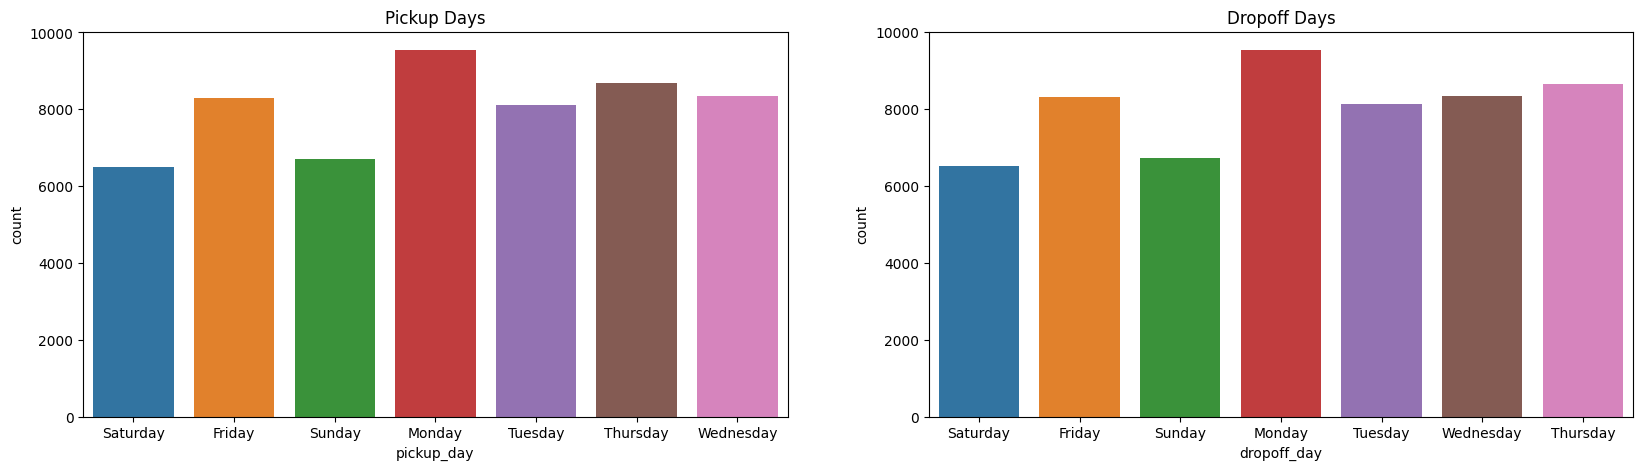

In [274]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=nyc_data_clean_dropna,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=nyc_data_clean_dropna,ax=ax2)


- We see Mondays are the busiest days followed by Thursdays.
- and Saturdays and Sundays are the least busiest days because people are not working on these days.

## Trips per hour

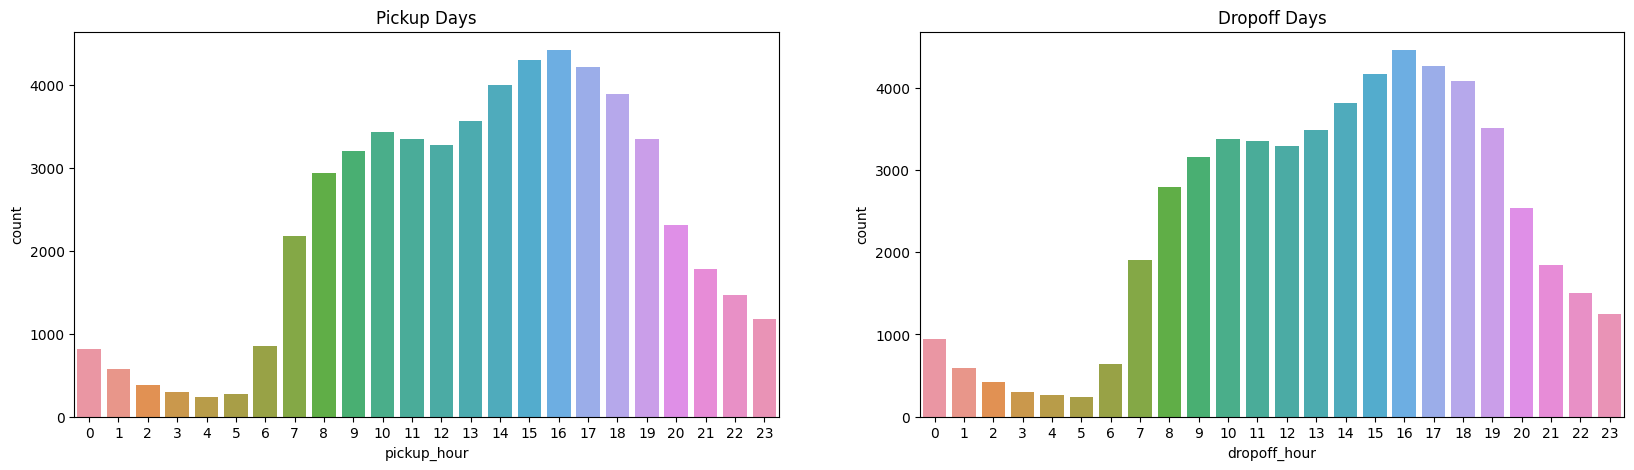

In [275]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=nyc_data_clean_dropna,ax=ax9)

ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=nyc_data_clean_dropna,ax=ax10)

- We see the busiest hours are 4:00 pm to 5:00 pm and that makes sense as this is the time when people return from their offices.


## Trips per Time of Day


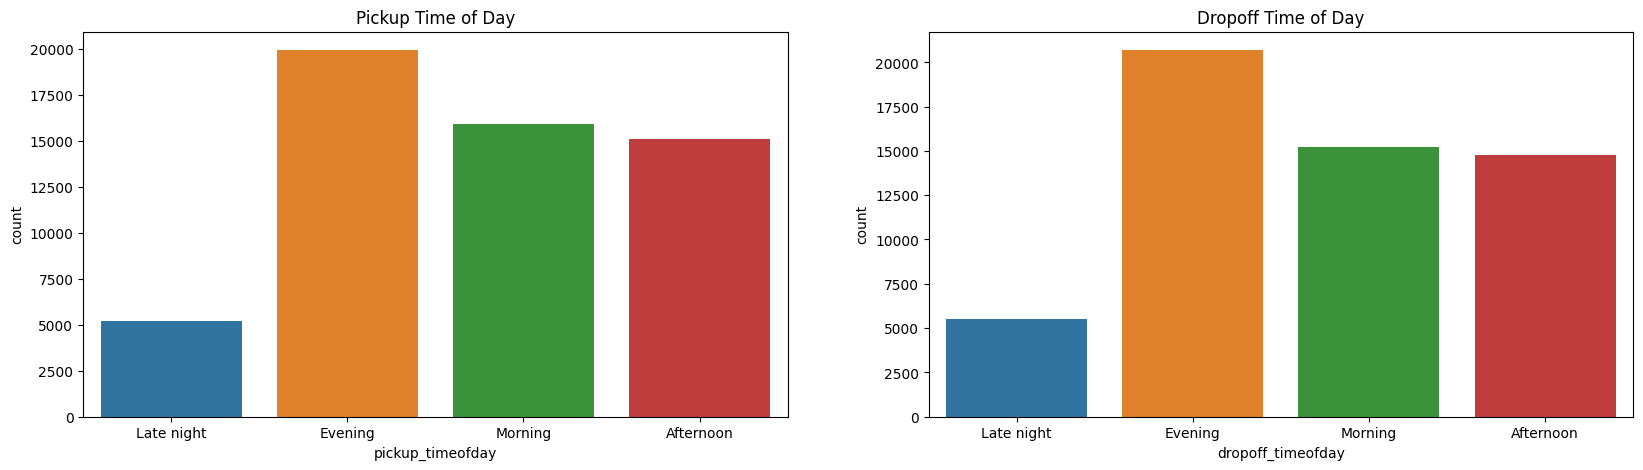

In [276]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=nyc_data_clean_dropna,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=nyc_data_clean_dropna,ax=ax4)

**- As we saw above, evenings are the busiest.**

## Trips per month


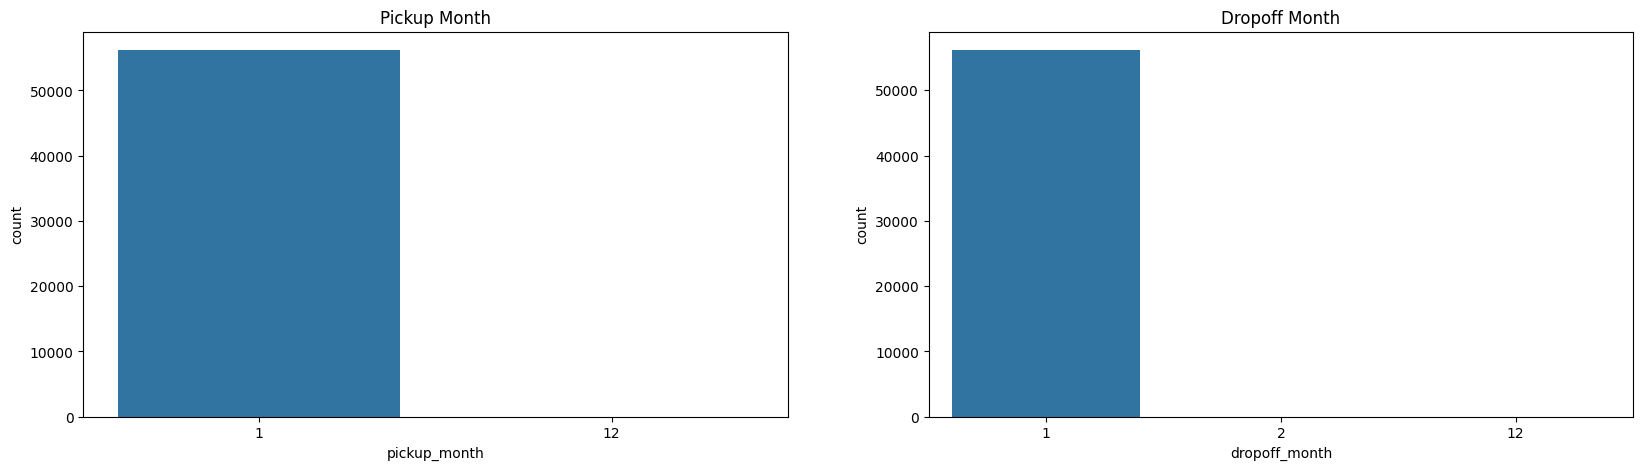

In [277]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=nyc_data_clean_dropna,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=nyc_data_clean_dropna,ax=ax12)

- As the data is from January only.
- The number of trips are carried out only in January.


# Bivariate Analysis
- Bivariate Analysis involves finding relationships, patterns, and correlations between two variables

In [278]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

In [279]:
nyc_data_clean_dropna.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration_minutes
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,1.200000
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.716667
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,Saturday,5,5,0,1,1,1,Late night,Late night,16.200000
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.250000
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,21.033333


## Trip Duration per VendorID


<AxesSubplot: xlabel='VendorID', ylabel='trip_duration_minutes'>

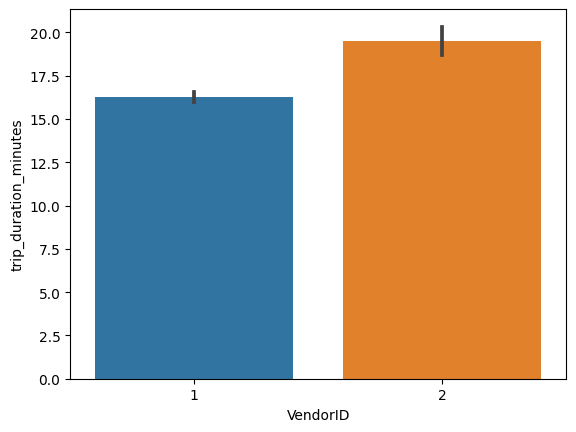

In [280]:
sns.barplot(y='trip_duration_minutes',x='VendorID',data=nyc_data_clean_dropna,estimator=np.mean)


- Vendor id 2 takes longer trips as compared to vendor 1.

## Trip Duration per Store and Forward Flag


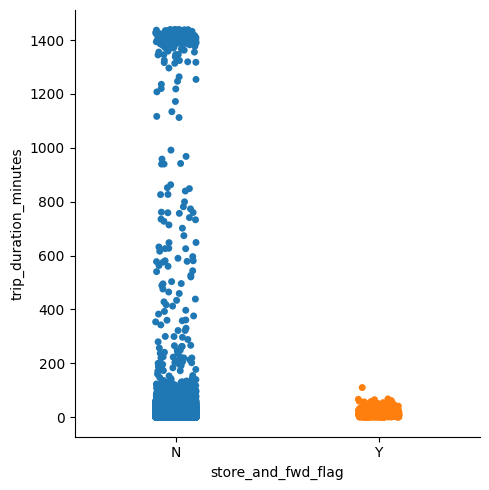

In [281]:
sns.catplot(y='trip_duration_minutes',x='store_and_fwd_flag', hue = "store_and_fwd_flag", data=nyc_data_clean_dropna,kind='strip')


- Trip duration is generally longer for trips whose flag was not stored.


## Trip Duration per passenger count


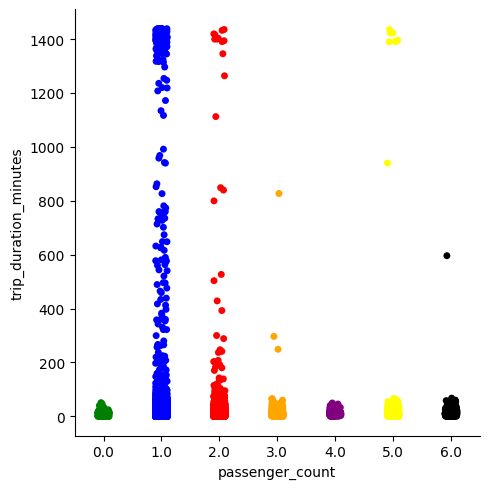

In [282]:
sns.catplot(y='trip_duration_minutes',x='passenger_count', hue= "passenger_count",
            palette= ['green', 'blue', 'red', 'orange', 'purple', 'yellow', 'black'],
            data=nyc_data_clean_dropna,kind='strip')


- The trip duration for passenger count 1 is the highest followed by passenger count 2.


## Trip Duration per hour


In [283]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

<AxesSubplot: xlabel='pickup_hour', ylabel='trip_duration_minutes'>

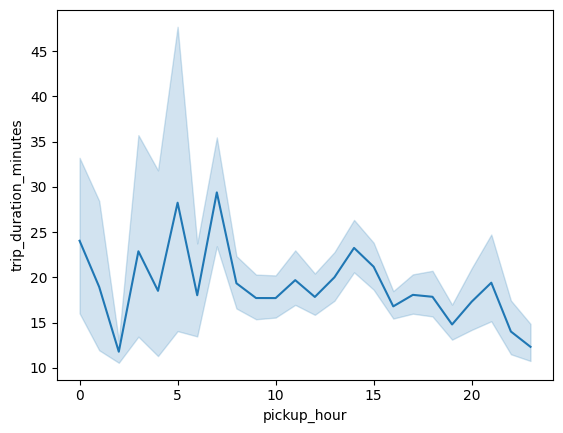

In [284]:
sns.lineplot(x='pickup_hour',y='trip_duration_minutes',data=nyc_data_clean_dropna)


- We see the trip duration is the maximum around 7 am which may be because of traffic on the roads.
Trip duration is the lowest around 2 am as streets may not be busy.

## Trip Duration per time of day


<AxesSubplot: xlabel='pickup_timeofday', ylabel='trip_duration_minutes'>

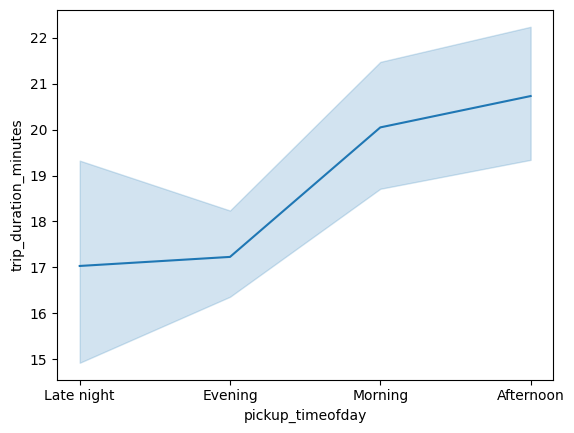

In [285]:
sns.lineplot(x='pickup_timeofday',y='trip_duration_minutes',data=nyc_data_clean_dropna)


- As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning.

## Trip Duration per Day of Week


<AxesSubplot: xlabel='pickup_day_no', ylabel='trip_duration_minutes'>

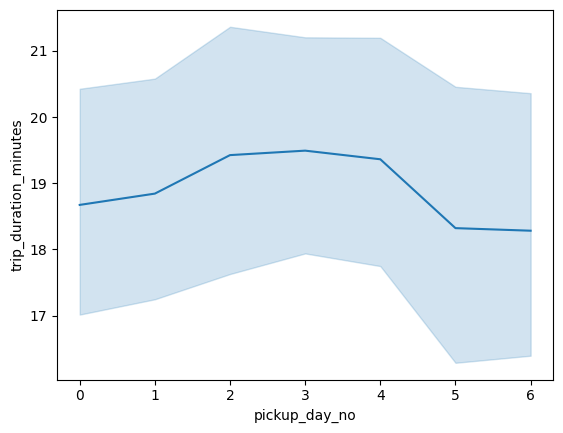

In [286]:
sns.lineplot(x='pickup_day_no',y='trip_duration_minutes',data=nyc_data_clean_dropna)


- Trip duration is the longest on Thursdays closely followed by Wednesday and Fridays.



## Trip Duration per month


<AxesSubplot: xlabel='pickup_month', ylabel='trip_duration_minutes'>

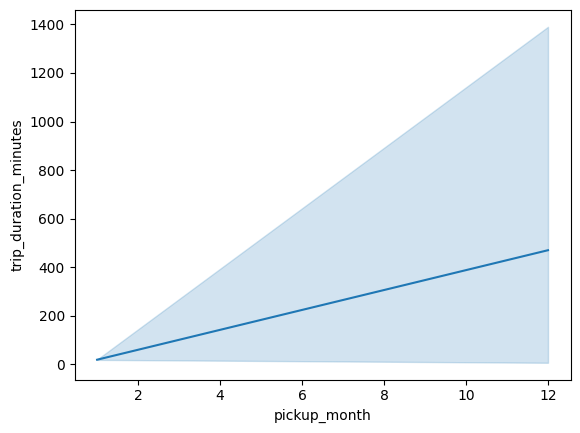

In [287]:
sns.lineplot(x='pickup_month',y='trip_duration_minutes',data=nyc_data_clean_dropna)


- The data is from January only, so we can’t see any difference in trip duration per month.

## Distance and Vendor


<AxesSubplot: xlabel='VendorID', ylabel='trip_distance'>

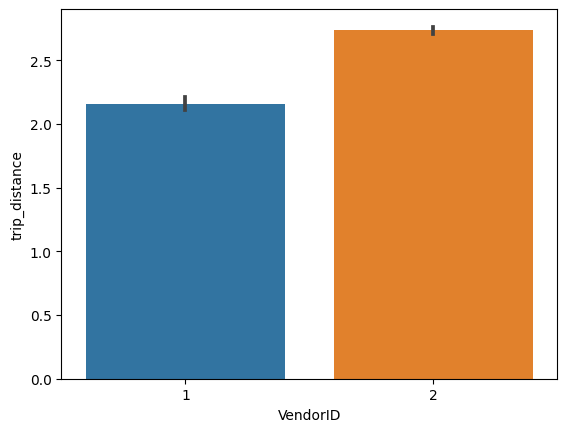

In [288]:
sns.barplot(y='trip_distance',x='VendorID',data=nyc_data_clean_dropna,estimator=np.mean)


- The distribution for both vendors is different.
- Vendor 2 covered distance than that of Vendor 1.



## Distance and Store and Forward Flag


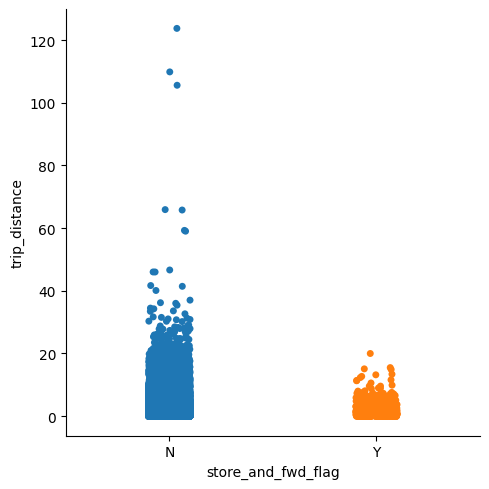

In [289]:
sns.catplot(y='trip_distance',x='store_and_fwd_flag', hue= "store_and_fwd_flag",data=nyc_data_clean_dropna,kind='strip')


- We see for longer distances the trip is not stored.


## Distance per passenger count


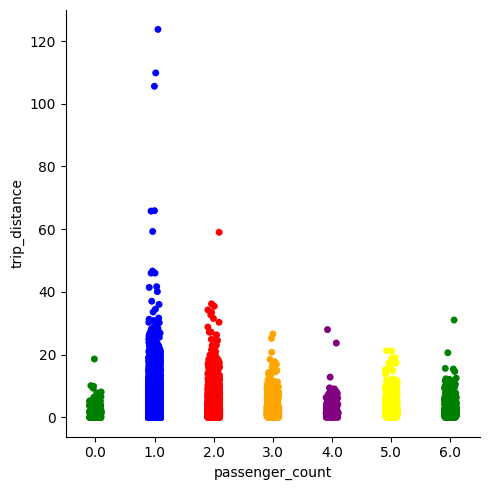

In [290]:
sns.catplot(y='trip_distance',x='passenger_count', hue= "passenger_count",
            palette= ['green', 'blue', 'red', 'orange', 'purple', 'yellow'],
            data=nyc_data_clean_dropna,kind='strip')


- We see some of the longer distances are covered by either 1 or 2 passenger rides.



## Distance per day of week


In [291]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

<AxesSubplot: xlabel='pickup_day_no', ylabel='trip_distance'>

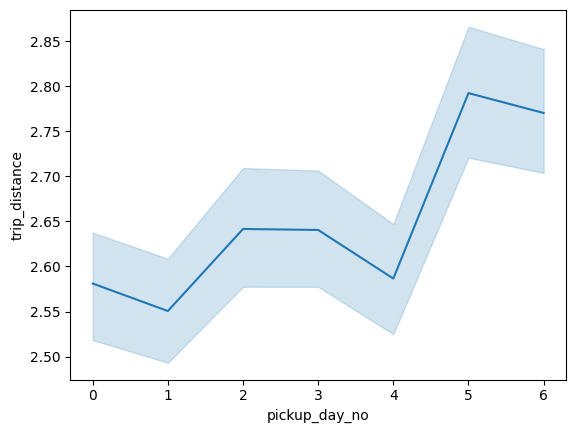

In [292]:
sns.lineplot(x='pickup_day_no',y='trip_distance',data=nyc_data_clean_dropna)


- Distances are longer on **Saturdays and Sundays** probably because it’s weekend.
- Other days Trip distances are relatively low.
- This probably means that there can be outstation trips on these days and/or the streets are busier.

## Distance per hour of day


<AxesSubplot: xlabel='pickup_hour', ylabel='trip_distance'>

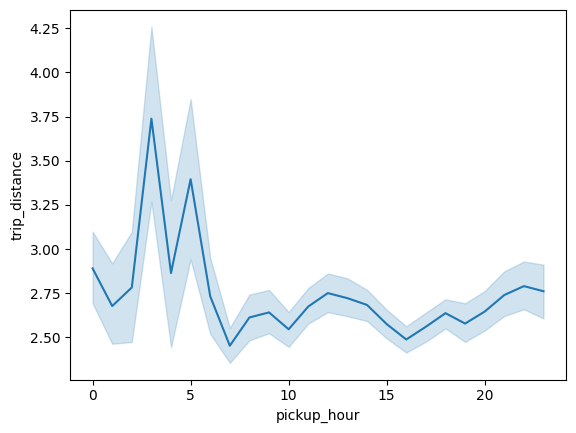

In [293]:
sns.lineplot(x='pickup_hour',y='trip_distance',data=nyc_data_clean_dropna)


- Distances are the longest around **3 am.**



## Distance per time of day


<AxesSubplot: xlabel='pickup_timeofday', ylabel='trip_distance'>

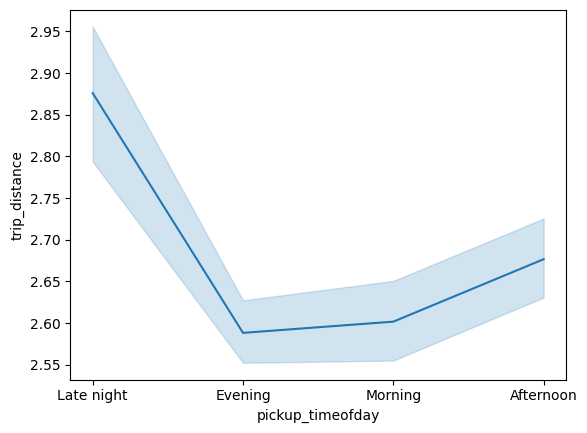

In [294]:
sns.lineplot(x='pickup_timeofday',y='trip_distance',data=nyc_data_clean_dropna)


- As seen above also, distances being the longest during **Late Night.**
- This can probably point to outstation trips where people start early for the day.

## Distance per month


<AxesSubplot: xlabel='pickup_month', ylabel='trip_distance'>

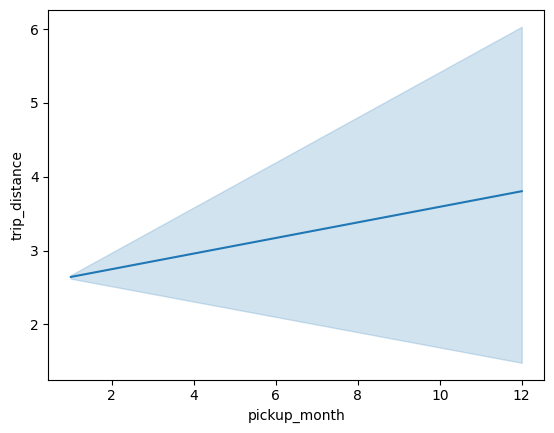

In [295]:
sns.lineplot(x='pickup_month',y='trip_distance',data=nyc_data_clean_dropna)


- trip distance is lowest in January and shows an increase each and every month till the highest in December.
- The Data is from January only.

## Passenger Count and Vendor id


<AxesSubplot: xlabel='VendorID', ylabel='passenger_count'>

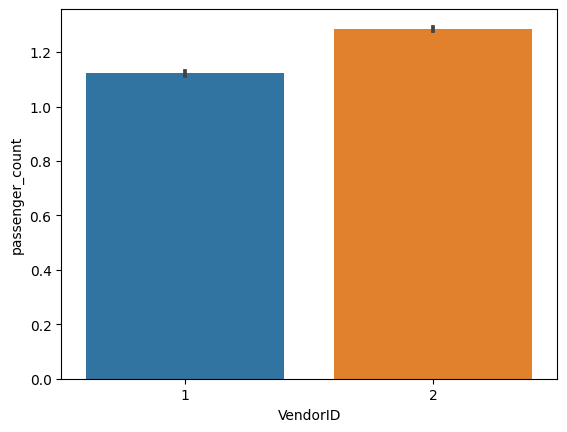

In [296]:
sns.barplot(y='passenger_count',x='VendorID',data=nyc_data_clean_dropna)


- This shows that vendor 2 generally carried 2 passengers rides more than the vendor 1.



## Trip Duration and Distance


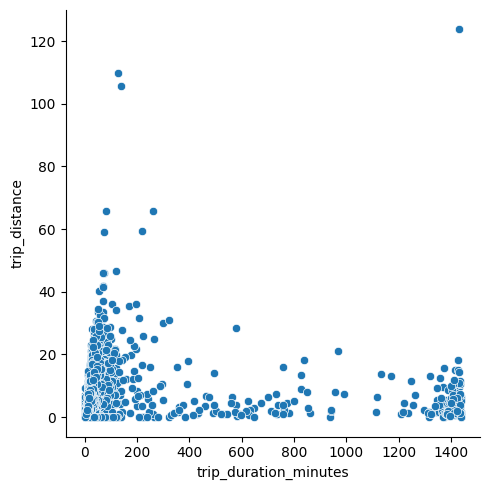

In [297]:
sns.relplot(y=nyc_data_clean_dropna.trip_distance,x='trip_duration_minutes',data=nyc_data_clean_dropna)


- We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

# Let us see few rows whose distances are 0.


In [298]:
nyc_data_clean_dropna[nyc_data_clean_dropna.trip_distance==0].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration_minutes
29,2,2022-01-01 00:02:14,2022-01-01 00:02:16,N,5.0,42,264,1.0,0.0,10.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,0.033333
60,2,2022-01-01 00:32:08,2022-01-01 00:43:43,N,1.0,43,163,1.0,0.0,8.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,11.583333
61,2,2022-01-01 00:58:11,2022-01-01 01:03:50,N,1.0,75,75,1.0,0.0,5.0,...,Saturday,5,5,0,1,1,1,Late night,Late night,5.650000
76,2,2022-01-01 19:08:04,2022-01-02 01:30:47,N,5.0,226,202,1.0,0.0,10.0,...,Sunday,5,6,19,1,1,1,Evening,Late night,382.716667
79,2,2022-01-01 01:47:33,2022-01-01 01:47:38,N,5.0,130,130,1.0,0.0,20.0,...,Saturday,5,5,1,1,1,1,Late night,Late night,0.083333


In [299]:
nyc_data_clean_dropna[nyc_data_clean_dropna.trip_distance==0].tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration_minutes
56142,1,2022-01-31 22:50:34,2022-01-31 23:10:26,N,1.0,64,10,1.0,0.0,33.2,...,Monday,0,0,22,23,1,1,Late night,Late night,19.866667
56145,2,2022-01-31 22:42:08,2022-01-31 22:42:15,N,5.0,177,177,1.0,0.0,25.0,...,Monday,0,0,22,22,1,1,Late night,Late night,0.116667
56157,2,2022-01-31 22:14:12,2022-01-31 22:14:27,N,1.0,193,193,1.0,0.0,0.0,...,Monday,0,0,22,22,1,1,Late night,Late night,0.250000
56189,2,2022-01-31 23:33:37,2022-01-31 23:33:50,N,5.0,191,191,1.0,0.0,195.0,...,Monday,0,0,23,23,1,1,Late night,Late night,0.216667
56190,1,2022-01-31 23:18:34,2022-01-31 23:54:12,N,1.0,10,136,1.0,0.0,47.2,...,Monday,0,0,23,23,1,1,Late night,Late night,35.633333


- We can see even though distance is recorded as 0 but trip duration is definitely more.

   - One reason can be that the dropoff coordinates weren’t recorded.
   - Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

In [300]:
nyc_data_clean_dropna.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration_minutes
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,1.200000
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.716667
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,Saturday,5,5,0,1,1,1,Late night,Late night,16.200000
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,8.250000
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,Saturday,5,5,0,0,1,1,Late night,Late night,21.033333


In [301]:
nyc_data_clean_dropna.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'trip_duration_minutes'],
      dtype='object')

## Tip amount and vendor id

<AxesSubplot: xlabel='VendorID', ylabel='tip_amount'>

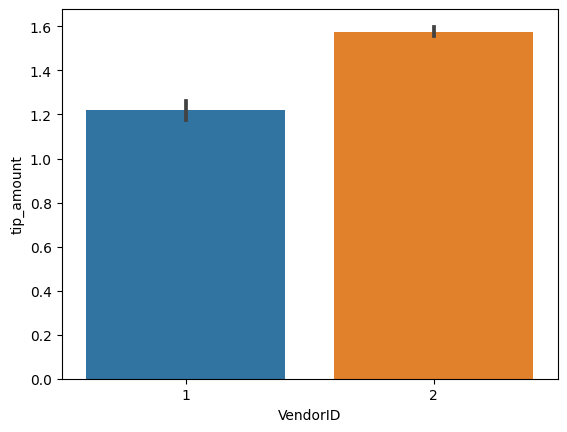

In [302]:
sns.barplot(y='tip_amount',x='VendorID',data=nyc_data_clean_dropna)

- The tip amount is higher for vendor 2.

## Tip amount and passenger count

<AxesSubplot: xlabel='passenger_count', ylabel='tip_amount'>

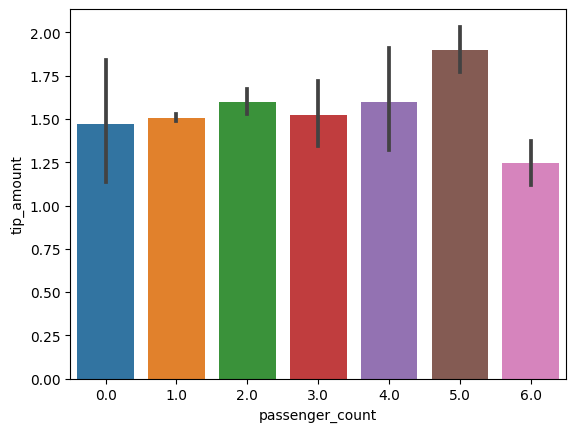

In [303]:
sns.barplot(y='tip_amount',x='passenger_count',data=nyc_data_clean_dropna)

- The tip amount is higher for passenger count 5.

## tip amount and Congestion surcharge

<AxesSubplot: xlabel='congestion_surcharge', ylabel='tip_amount'>

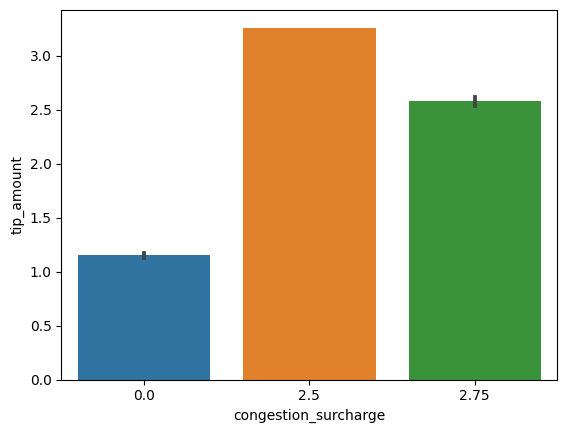

In [304]:
sns.barplot(y='tip_amount',x='congestion_surcharge',data=nyc_data_clean_dropna)

-  for congestion surcharge of 2.5, the tip amount is higher.
-  Or the tip amount is higher for congestion surcharge of 2.5.

In [305]:
nyc_data_clean_dropna.corr()
corr_nyc_data = nyc_data_clean_dropna.corr()

<AxesSubplot: >

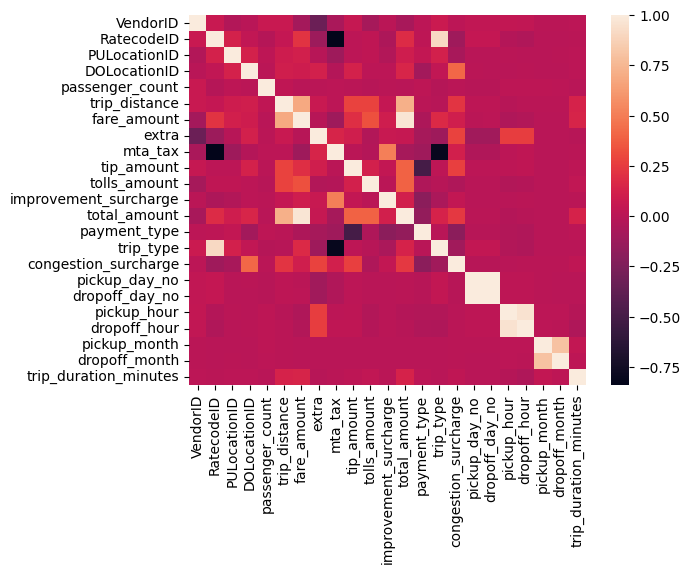

In [306]:
sns.heatmap(corr_nyc_data)

<AxesSubplot: >

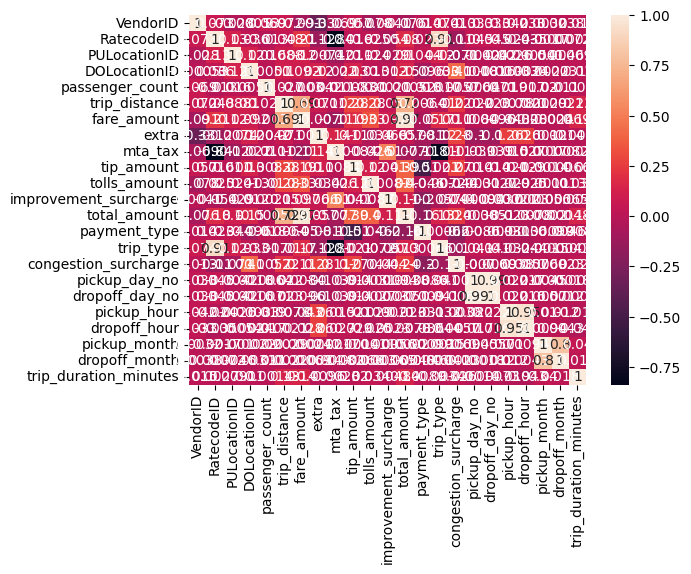

In [307]:
sns.heatmap(corr_nyc_data, annot=True)

- #### So, we see how Exploratory Data Analysis helps us identify underlying patterns in the data.